# 2.2 Немного теории и энтропии

In [64]:
from sklearn import tree
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [65]:
data = pd.DataFrame({'X_1': [1, 1, 1, 0, 0, 0, 0, 1],
                     'X_2': [0, 0, 0, 1, 0, 0, 0, 1],
                     'Y': [1, 1, 1, 1, 0, 0, 0, 0]})
data

,X_1,X_2,Y
0,1,0,1
1,1,0,1
2,1,0,1
3,0,1,1
4,0,0,0
5,0,0,0
6,0,0,0
7,1,1,0


In [66]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [67]:
X = data[['X_1','X_2']]
y = data.Y

In [68]:
clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [69]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from IPython.display import HTML
style = "<style>svg{width:50% !important;height:50%; !important;}</style>"
HTML(style)

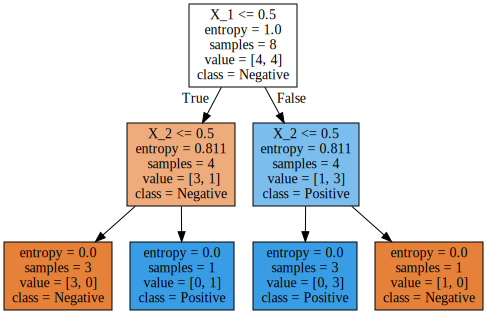

In [70]:
graph = Source(tree.export_graphviz(clf, out_file=None,
                                    feature_names=list(X),
                                    class_names=['Negative', 'Positive'],
                                    filled=True))
display(SVG(graph.pipe(format='svg')))

In [71]:
data = pd.read_csv('https://stepik.org/media/attachments/course/4852/cats.csv')

In [72]:
data

,Unnamed: 0,Шерстист,Гавкает,Лазает по деревьям,Вид
0,0,1,1,0,собачка
1,1,1,1,0,собачка
2,2,1,1,0,собачка
3,3,1,1,0,собачка
4,4,1,0,1,котик
5,5,1,0,1,котик
6,6,1,0,1,котик
7,7,1,0,1,котик
8,8,1,1,1,котик
9,9,0,0,1,котик


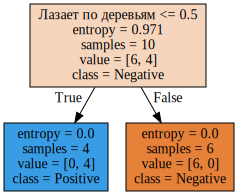

In [73]:
X = data[['Лазает по деревьям']]
y = data.Вид

clf.fit(X, y)
graph = Source(tree.export_graphviz(clf, out_file=None,
                                    feature_names=list(X),
                                    class_names=['Negative', 'Positive'],
                                    filled=True))
display(SVG(graph.pipe(format='svg')))

In [74]:
N = n1 + n2
Ey = 0.97
n1 = 4
n2 = 6
E1 = 0
E2 = 0
Ey - (n1/N * E1 + n2/N * E2)

NameError: name 'n1' is not defined

In [75]:
import pandas as pd
from scipy.stats import entropy


def ent(data):
  return entropy(data.Вид.value_counts() / len(data), base=2)


def ig(data, feature):
  ent0 = ent(data[data[feature] == 0])
  ent1 = ent(data[data[feature] == 1])
  n = len(data)
  n0 = len(data[data[feature] == 0])
  n1 = len(data[data[feature] == 1])
  return ent(data) - ent0 * n0 / n - ent1 * n1 / n


df = pd.read_csv('https://stepik.org/media/attachments/course/4852/cats.csv', index_col=0)

print('IG по шертистости: ', ig(df, 'Шерстист'))
print('IG по голосу: ', ig(df, 'Гавкает'))
print('IG по деревьям: ', ig(df, 'Лазает по деревьям'))


IG по шертистости:  0.07898214060026876
IG по голосу:  0.6099865470109876
IG по деревьям:  0.9709505944546688


In [76]:
df[df['Шерстист'] == 0]

,Шерстист,Гавкает,Лазает по деревьям,Вид
9,0,0,1,котик


# 2.3 Titanic: Machine Learning from Disaster

In [213]:
titanic_data = pd.read_csv('train.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [214]:
X = titanic_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y = titanic_data.Survived
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [215]:
X = pd.get_dummies(X)
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [216]:
X = X.fillna({'Age' : X.Age.median()})

In [217]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [218]:
clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

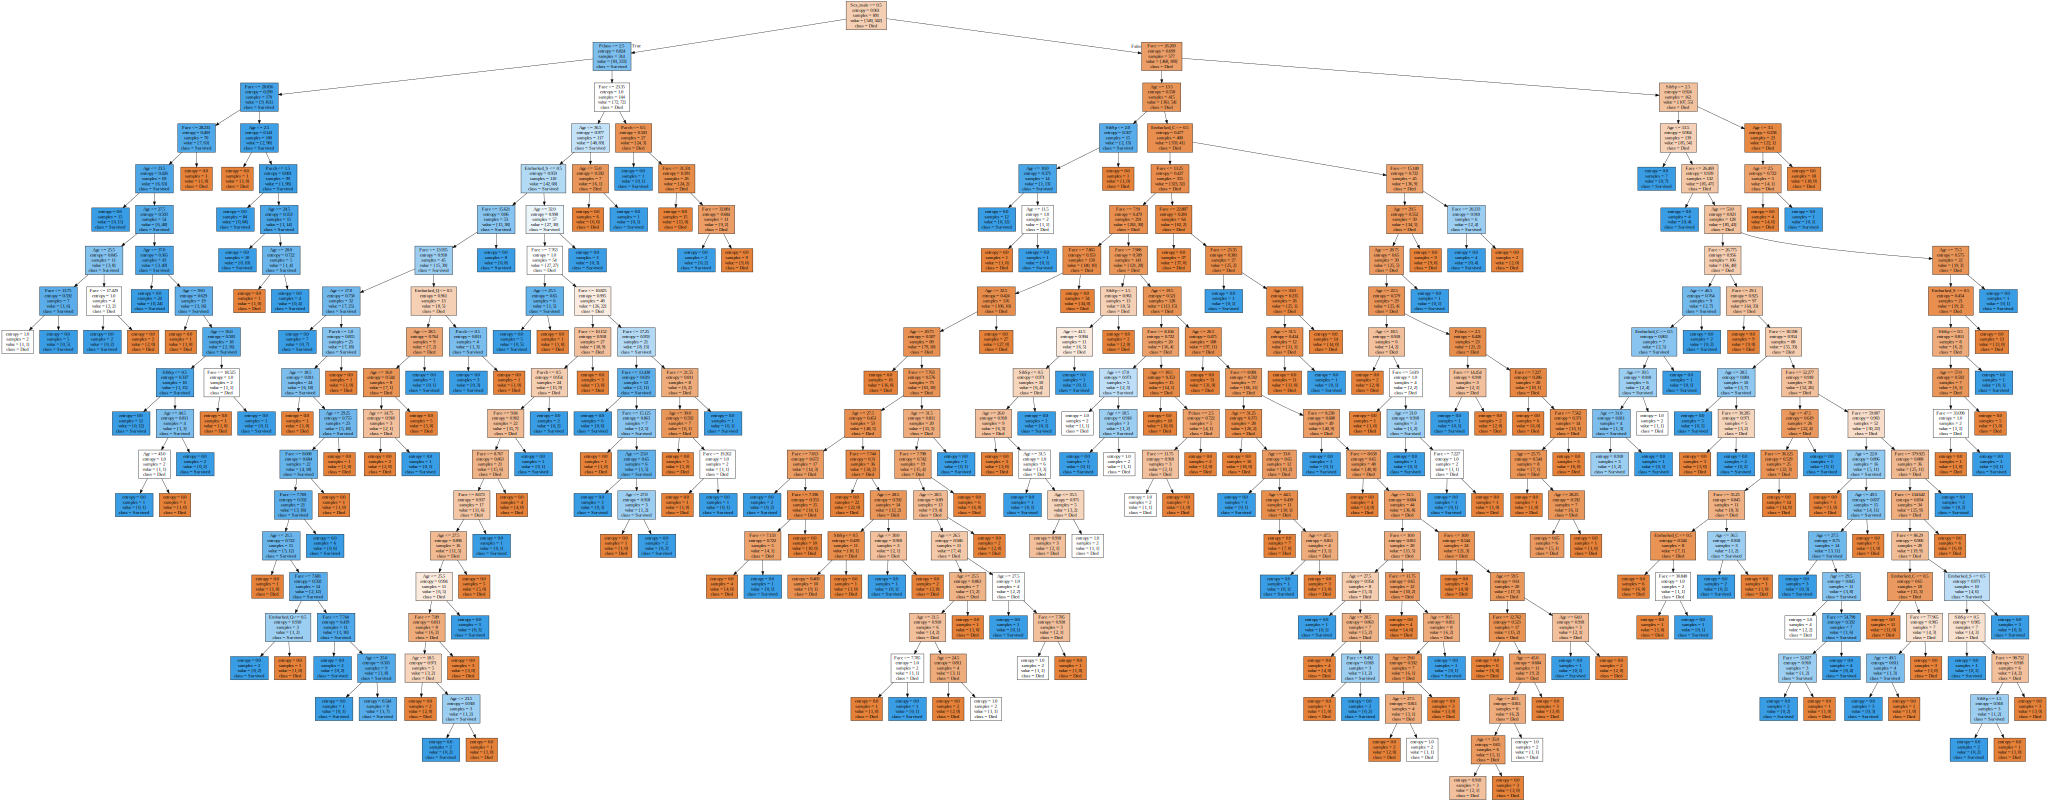

In [219]:
graph = Source(tree.export_graphviz(clf, out_file=None,
                                    feature_names=list(X),
                                    class_names=['Died', 'Survived'],
                                    filled=True))
display(SVG(graph.pipe(format='svg')))

In [220]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.33, random_state=42)

In [221]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [86]:
clf.score(X_train, y_train)

0.9798657718120806

In [87]:
clf.score(X_test, y_test)

0.7796610169491526

In [88]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [89]:
clf.score(X_train, y_train)

0.8238255033557047

In [90]:
clf.score(X_test, y_test)

0.8203389830508474

# 2.4 Обучение, переобучение, недообучение и кросвалидация

In [91]:
max_depth_values = range(1,100)

In [92]:
scores_data = pd.DataFrame()

In [93]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    temp_score_data = pd.DataFrame({'max_depth': [max_depth], 'train_score': [train_score], 'test_score': [test_score]})
    
    
    scores_data = scores_data.append(temp_score_data)

In [94]:
scores_data.head()

,max_depth,train_score,test_score
0,1,0.781879,0.796610
0,2,0.805369,0.776271
0,3,0.823826,0.820339
0,4,0.833893,0.823729
0,5,0.840604,0.806780


In [95]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], value_vars=['train_score', 'test_score'],
                           var_name='set_type', value_name='score')
scores_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604


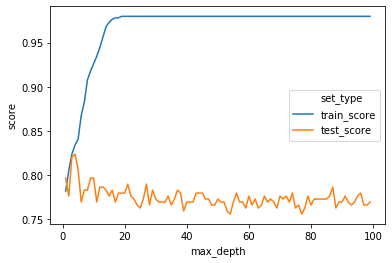

In [96]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long)

In [97]:
from sklearn.model_selection import cross_val_score
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)

In [98]:
cross_val_score(clf, X_train, y_train, cv=5)

array([0.74166667, 0.8       , 0.78991597, 0.78991597, 0.73728814])

In [99]:
cross_val_score(clf, X_train, y_train, cv=5).mean()

0.7700909177230214

In [100]:
scores_data = pd.DataFrame()

In [101]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    mean_cross_val_score = cross_val_score(clf, X_train, y_train , cv=5).mean()
    
    temp_score_data = pd.DataFrame({'max_depth': [max_depth],
                                    'train_score': [train_score],
                                    'test_score': [test_score],
                                    'cross_val_score': [mean_cross_val_score]})
    scores_data = scores_data.append(temp_score_data)

In [102]:
scores_data.head()

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,0.781857
0,2,0.805369,0.776271,0.768553
0,3,0.823826,0.820339,0.788678
0,4,0.833893,0.823729,0.783580
0,5,0.840604,0.806780,0.796942


In [103]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], value_vars=['train_score', 'test_score', 'cross_val_score'],
                           var_name='set_type', value_name='score')
scores_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604


In [104]:
scores_data_long.query('set_type == "cross_val_score"').head(20)

,max_depth,set_type,score
198,1,cross_val_score,0.781857
199,2,cross_val_score,0.768553
200,3,cross_val_score,0.788678
201,4,cross_val_score,0.783580
202,5,cross_val_score,0.796942
203,6,cross_val_score,0.793707
204,7,cross_val_score,0.796984
205,8,cross_val_score,0.798608
206,9,cross_val_score,0.793594
207,10,cross_val_score,0.801969


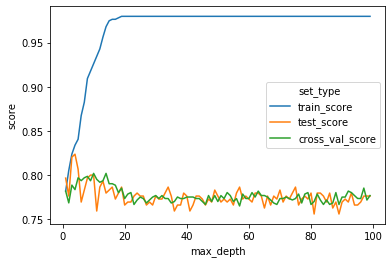

In [105]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long)

In [106]:
best_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [107]:
best_clf.fit(X_train, y_train)

best_clf.score(X_test, y_test)

0.7966101694915254

### Step 13

In [108]:
df_train = pd.read_csv('https://stepik.org/media/attachments/course/4852/train_iris.csv',index_col=0)
df_test = pd.read_csv('https://stepik.org/media/attachments/course/4852/test_iris.csv',index_col=0)

In [109]:
max_depth_values = range(1,100)
scores_data = pd.DataFrame()

X_train = df_train.drop('species', axis=1)
y_train = df_train.species

X_test = df_test.drop('species', axis=1)
y_test = df_test.species

In [112]:
np.random.seed(0)

for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    temp_score_data = pd.DataFrame({'max_depth': [max_depth], 'train_score': [train_score], 'test_score': [test_score]})

    scores_data = scores_data.append(temp_score_data)

In [113]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], value_vars=['train_score', 'test_score'],
                           var_name='set_type', value_name='score')
scores_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.70
1,2,train_score,0.97
2,3,train_score,0.99
3,4,train_score,1.00
4,5,train_score,1.00


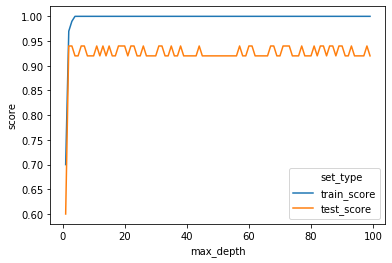

In [114]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long)

# Step 14

In [139]:
df = pd.read_csv('https://stepik.org/media/attachments/course/4852/dogs_n_cats.csv')

df_train = pd.get_dummies(df).drop('Вид_котик', axis=1)
df_train.head()

X_train = df_train.drop('Вид_собачка', axis=1)
y_train = df_train.Вид_собачка

In [140]:
df_train.head()

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям,Вид_собачка
0,15,18.0,1,1,0,1
1,20,24.0,1,0,0,1
2,34,40.8,1,1,0,1
3,26,31.2,1,1,0,1
4,16,19.2,1,1,0,1


In [142]:
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [178]:
X_test = pd.read_json('dataset_209691_15.txt')
X_test.head()

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям
0,22,26.4,1,1,0
1,34,40.8,1,1,0
10,20,24.0,1,0,0
11,19,22.8,1,0,0
12,28,33.6,1,1,0


In [164]:
np.sum(list(clf.predict(X_test)))

40

In [182]:
sum(X_test['Лазает по деревьям'] == 0)

40

# Step 13

In [187]:
df = pd.read_csv('https://stepik.org/media/attachments/course/4852/songs.csv')
df.head()

,song,year,artist,genre,lyrics,length,commas,exclamations,colons,hyphens
0,the-ownerz,2007,gangstarr,Hip-Hop,"""One-two..""\n""One-two, shots to the chin.. kno...",1300,24,5,0,11
1,dead-sound-of-misery,2006,blind-guardian,Metal,It's dark\nLet's do it now\nBring in the siren...,1566,0,0,0,0
2,modred-s-song,2006,blind-guardian,Metal,I've lost my battle before it starts\nmy first...,996,1,0,1,0
3,the-ninth-wave,2015,blind-guardian,Metal,As dark night embraces\nWe are the nation\nI w...,2868,5,0,0,0
4,skills,2014,gangstarr,Hip-Hop,"Skills, skills, skills\n""My Microphone""\n""It's...",3351,22,0,0,3


In [195]:
X_train = df.drop(['artist','lyrics', 'song', 'genre'], axis=1)
y_train = df.artist
X_train.head()

,year,length,commas,exclamations,colons,hyphens
0,2007,1300,24,5,0,11
1,2006,1566,0,0,0,0
2,2006,996,1,0,1,0
3,2015,2868,5,0,0,0
4,2014,3351,22,0,0,3


In [198]:
from sklearn.metrics import precision_score

for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    precision = precision_score(y_train, predictions, average='micro') 

NameError: name 'predictions' is not defined

# 2.6 Подбор параметров и ROC and Roll

In [271]:
from sklearn.model_selection import GridSearchCV

In [272]:
clf = tree.DecisionTreeClassifier()
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [273]:
parameters = {'criterion': ['gini', 'entropy'], 'max_depth':range(1, 30)}

In [274]:
grid_search_cv_clf = GridSearchCV(clf, parameters, cv=5)

In [275]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30)},
             pre_dispatc

In [276]:
grid_search_cv_clf.best_params_

{'criterion': 'entropy', 'max_depth': 5}

In [352]:
best_clf = grid_search_cv_clf.best_estimator_

C:\Users\SerPetr\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [278]:
best_clf

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [279]:
best_clf.score(X_test, y_test)

0.8101694915254237

In [280]:
from sklearn.metrics import precision_score, recall_score

In [281]:
y_pred = best_clf.predict(X_test)

In [282]:
precision_score(y_test, y_pred)

0.7962962962962963

In [283]:
recall_score(y_test, y_pred)  

0.7166666666666667

In [284]:
y_pred

array([0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0], dtype=int64)

In [285]:
y_predicted_prob = best_clf.predict_proba(X_test)

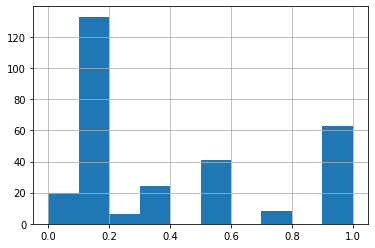

In [286]:
pd.Series(y_predicted_prob[:, 1]).hist()

In [309]:
y_pred = np.where(y_predicted_prob[:, 1] > 0.9, 1, 0)

In [310]:
precision_score(y_test, y_pred)

0.9206349206349206

In [311]:
recall_score(y_test, y_pred)  

0.48333333333333334

In [296]:
pd.Series(y_predicted_prob[:, 1]).unique()

array([0.125     , 1.        , 0.50943396, 0.5       , 0.56      ,
       0.        , 0.25      , 0.32352941, 0.98507463, 0.75      ])

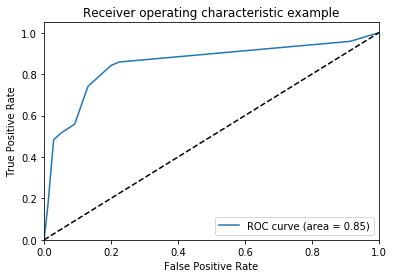

In [313]:
from sklearn.metrics import roc_curve, auc
from sklearn.datasets import make_classification

fpr, tpr, thresholds = roc_curve(y_test, y_predicted_prob[:,1])
roc_auc= auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % (roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


# 2.7 Практика, Scikit-learn, fit, predict, you are awesome

In [319]:
df = pd.read_csv('https://stepik.org/media/attachments/course/4852/train_data_tree.csv')
X_train = df.drop('num', axis=1)
y_train = df.num

In [317]:
df.head()

,sex,exang,num
0,1,1,1
1,1,1,1
2,1,0,1
3,1,0,0
4,1,0,1


In [318]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [320]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

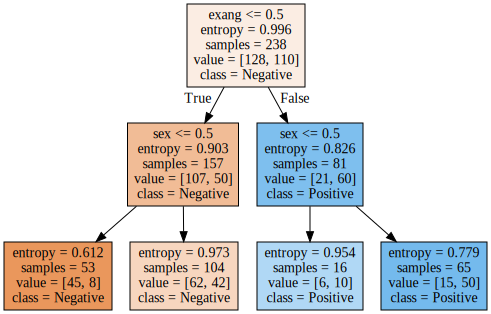

In [322]:
graph = Source(tree.export_graphviz(clf, out_file=None,
                                    feature_names=list(X_train),
                                    class_names=['Negative', 'Positive'],
                                    filled=True))
display(SVG(graph.pipe(format='svg')))

In [329]:
E_Y = clf.tree_.impurity[0]
E_Y_X = clf.tree_.n_node_samples[1] / clf.tree_.n_node_samples[0] * clf.tree_.impurity[1] + \
        clf.tree_.n_node_samples[4] / clf.tree_.n_node_samples[0] * clf.tree_.impurity[4]        
IG = E_Y - E_Y_X

IG

0.11939340343891591

In [326]:
clf.tree_.impurity

array([0.99587   , 0.90271134, 0.61219613, 0.97315604, 0.82562653,
       0.954434  , 0.77934984])

In [334]:
clf.tree_.n_node_samples

array([238, 157,  53, 104,  81,  16,  65], dtype=int64)

# Step 6

In [349]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.25, random_state=42)

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
predicted = dt.predict(X_test)

In [357]:
parameters = {'criterion': ['gini', 'entropy'], 'max_depth':range(1, 30)}

# Step 10

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris


iris = load_iris()
X = iris.data
y = iris.target

In [28]:
clf = DecisionTreeClassifier()

parameters = {'min_samples_leaf':range(1, 11), 'max_depth':range(1, 11), 'min_samples_split':range(2, 11)}

search = GridSearchCV(clf, parameters, cv=5)

In [29]:
search.fit(X, y)

best_tree = search.best_estimator_

In [25]:
search.best_params_

{'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [26]:

best_tree = search.best_estimator_

In [27]:
best_tree

best_tree.score(X, y)

0.9733333333333334

# Step 11

In [8]:
from sklearn.model_selection import RandomizedSearchCV

In [31]:
clf = DecisionTreeClassifier()

parameters = {'min_samples_leaf':range(1, 11), 'max_depth':range(1, 11), 'min_samples_split':range(2, 11)}

search = RandomizedSearchCV(clf, parameters, cv=5)

search.fit(X, y)

best_tree = search.best_estimator_

In [32]:
search.best_params_

{'min_samples_split': 5, 'min_samples_leaf': 3, 'max_depth': 4}

In [33]:
best_tree = search.best_estimator_

best_tree.score(X, y)

0.98

In [34]:
predictions = best_tree.predict(X)

In [36]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y, predictions)

array([[50,  0,  0],
       [ 0, 49,  1],
       [ 0,  2, 48]], dtype=int64)

# Step 12

In [ ]:
clf = DecisionTreeClassifier()

parameters = {'min_samples_leaf':range(1, 11), 'max_depth':range(1, 11), 'min_samples_split':range(2, 11)}

search = GridSearchCV(clf, parameters, cv=5)

search.fit(train.drop('y', axis=1), train.y)

best_tree = search.best_estimator_

predictions = best_tree.predict(test)

# Step 13

In [ ]:
import pandas as pd

from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y, predictions)

In [ ]:
a = 2**4096**4
b = 2

In [41]:
a | b

1044388881413152506691752710716624382579964249047383780384233483283953907971557456848826811934997558340890106714439262837987573438185793607263236087851365277945956976543709998340361590134383718314428070011855946226376318839397712745672334684344586617496807908705803704071284048740118609114467977783598029006686938976881787785946905630190260940599579453432823469303026696443059025015972399867714215541693835559885291486318237914434496734087811872639496475100189041349008417061675093668333850551032972088269550769983616369411933015213796825837188091833656751221318492846368125550225998300412344784862595674492194617023806505913245610825731835380087608622102834270197698202313169017678006675195485079921636419370285375124784014907159135459982790513399611551794271106831134090584272884279791554849782954323534517065223269061394905987693002122963395687782878948440616007412945674919823050571642377154816321380631045902916136926708342856440730447899971901781465763473223850267253059899795996090799469201774

In [42]:
bin(a)

'0b1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

In [43]:
a.bit_length()

4097